##### I have used chapter 17 of the Bayesian cognitive modeling book (Lee & Wagenmakers, 2015) as reference for the assignment. 

In [1]:
import pymc3 as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data={'y': [[245], [218], [255], [126], [182], [71], [102], [65]], 
 'd1': [[0.0, 0.0, 1.0000499999999999, 1.0000499999999999, 1.95205, 1.95205, 3.1131, 3.1131], [0.0, 0.0, 1.0000499999999999, 1.0000499999999999, 1.95205, 1.95205, 3.1131, 3.1131], [1.0000499999999999, 1.0000499999999999, 0.0, 0.0, 0.952, 0.952, 2.11305, 2.11305], [1.0000499999999999, 1.0000499999999999, 0.0, 0.0, 0.952, 0.952, 2.11305, 2.11305], [1.95205, 1.95205, 0.952, 0.952, 0.0, 0.0, 1.16105, 1.16105], [1.95205, 1.95205, 0.952, 0.952, 0.0, 0.0, 1.16105, 1.16105], [3.1131, 3.1131, 2.11305, 2.11305, 1.16105, 1.16105, 0.0, 0.0], [3.1131, 3.1131, 2.11305, 2.11305, 1.16105, 1.16105, 0.0, 0.0]], 
 'd2': [[0.0, 1.1750500000000001, 0.829, 2.23, 0.829, 2.23, 0.0, 1.1750500000000001], [1.1750500000000001, 0.0, 2.00405, 1.0549499999999998, 2.00405, 1.0549499999999998, 1.1750500000000001, 0.0], [0.829, 2.00405, 0.0, 3.059, 0.0, 3.059, 0.829, 2.00405], [2.23, 1.0549499999999998, 3.059, 0.0, 3.059, 0.0, 2.23, 1.0549499999999998], [0.829, 2.00405, 0.0, 3.059, 0.0, 3.059, 0.829, 2.00405], [2.23, 1.0549499999999998, 3.059, 0.0, 3.059, 0.0, 2.23, 1.0549499999999998], [0.0, 1.1750500000000001, 0.829, 2.23, 0.829, 2.23, 0.0, 1.1750500000000001], [1.1750500000000001, 0.0, 2.00405, 1.0549499999999998, 2.00405, 1.0549499999999998, 1.1750500000000001, 0.0]], 
 'nstim': 8, 
 'nsubj': 40, 
 'a': [1, 1, 1, 2, 1, 2, 2, 2],
 'x': [[5, 6, 6, 2, 4, 1, 3, 1], [5, 6, 8, 0, 3, 1, 5, 2], [7, 7, 8, 6, 1, 2, 2, 3], [7, 7, 6, 3, 5, 4, 0, 1], [8, 6, 8, 7, 3, 3, 1, 0], [8, 7, 8, 3, 4, 0, 0, 0], [6, 5, 5, 3, 3, 1, 4, 1], [8, 8, 6, 4, 4, 0, 1, 0], [7, 8, 8, 4, 7, 0, 3, 0], [8, 8, 8, 7, 4, 1, 1, 0], [8, 8, 8, 3, 3, 0, 1, 0], [7, 6, 7, 4, 3, 1, 1, 0], [7, 8, 7, 1, 3, 0, 0, 3], [7, 6, 8, 2, 5, 0, 1, 0], [8, 4, 6, 5, 4, 3, 4, 2], [7, 7, 8, 5, 4, 5, 2, 0], [8, 8, 7, 3, 5, 0, 1, 0], [8, 6, 7, 6, 4, 2, 1, 1], [8, 6, 8, 1, 2, 0, 1, 0], [8, 6, 8, 4, 5, 1, 0, 0], [5, 6, 6, 3, 1, 2, 2, 1], [3, 4, 4, 5, 4, 5, 1, 2], [3, 3, 5, 3, 7, 2, 5, 5], [5, 3, 6, 2, 4, 1, 5, 1], [5, 6, 6, 1, 7, 1, 3, 3], [8, 7, 3, 4, 7, 5, 2, 0], [6, 3, 7, 3, 6, 1, 5, 6], [8, 8, 6, 3, 5, 1, 0, 0], [2, 3, 4, 2, 7, 6, 6, 4], [6, 5, 6, 1, 4, 1, 1, 1], [4, 2, 3, 3, 4, 5, 4, 6], [6, 6, 6, 2, 7, 2, 1, 1], [5, 1, 7, 0, 6, 0, 7, 3], [4, 2, 5, 0, 6, 1, 8, 4], [7, 6, 7, 6, 3, 1, 0, 3], [6, 7, 3, 4, 8, 6, 2, 3], [8, 7, 7, 3, 6, 1, 2, 1], [3, 3, 5, 3, 2, 3, 4, 3], [4, 0, 8, 0, 7, 0, 7, 1], [2, 3, 6, 5, 5, 2, 5, 3]],
 'n': 8}

### Dependency diagram

<img src="Assignment3_heirarchy.png" >

Attentional weight (w) - I have chosen a uniform prior between (0,1) for the attention weight parameter (w). The lower and upper limits are set to 0 and 1 because choosing limits greater than 1 and lesser than 0 would assign negative attentional weights to the dimensions. Uniform credibility is assigned across the values because there is no prior information about the value of w.   

Generalisation (c)- I have chosen a uniform prior between (0,5) for the generalisation parameter (c). The lower and upper limits are set to 0 and 5 because a limit less than 0 would assign negative generalisation, and a large upper limit would make the similarity parameter calculation unfeasible. Uniform credibility is assigned across the values because there is no prior information about the value of c.   

In [12]:
t=320
y=np.array(data['y']).flatten()
d1=np.array(data['d1'])
d2=np.array(data['d2'])

with pm.Model() as model_a:
  
    b=0.5
    c=pm.Uniform('c', lower=0, upper=5)
    w=pm.Uniform('w', lower=0, upper=1)
    
   
    s=pm.Deterministic('s',pm.math.exp(-c*(w*d1+(1-w)*d2)))
    simA=pm.Deterministic('simA',(np.array([[1 if x==1 else 0 for x in data['a']]]*8)*s).sum(axis=1)) 
    simB=pm.Deterministic('simB',(np.array([[1 if x==2 else 0 for x in data['a']]]*8)*s).sum(axis=1))
    p=pm.Deterministic('p', b*simA/((b*simA)+((1-b)*simB))) 
    
    y_pred=pm.Binomial('y_pred',p=p,n=t, observed=y) 
    trace_total=pm.sample(1000)

<ipython-input-12-4380ccb35eb9>:19: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_total=pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [w, c]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 207 seconds.


#### Attention weight (w)

<AxesSubplot:title={'center':'x'}>

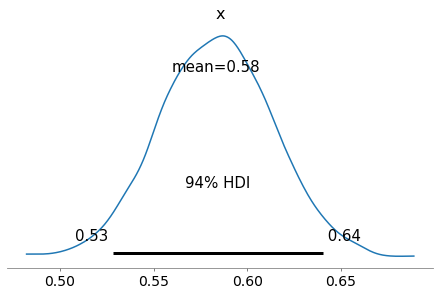

In [4]:
az.plot_posterior(trace_total['w'])

The mean is at 0.58, and the 94%HDI is between 0.53 and 0.64. We can therefore conclude that both dimensions are given sufficient attention for categorisation. Since the mean is at 0.58 and 0.5 is not included in the 94% HDI, there is a possibility that subjects assign slightly higher weightage for the first attribute (position of the rectangle). However, given that the lower limit of the HDI is 0.53, the argument is not solid, and further evidence is required to arrive at this conclusion.

#### Generalisation (c)

<AxesSubplot:title={'center':'x'}>

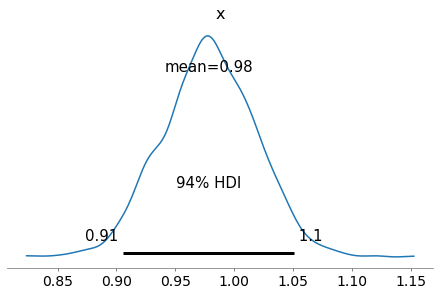

In [5]:
az.plot_posterior(trace_total['c'])

A minimal generalisation value would imply that the stimuli are very similar (s→0), and a high value would imply that the stimuli are very different. Categorisation requires seeing the typical features in stimuli to group them in a specific category and the discriminative features in stimuli to differentiate between the categories. The mean is around 1, which implies that subjects (on average) can see the similarities and differences between the stimuli.

Text(0, 0.5, 'Attention weight (w)')

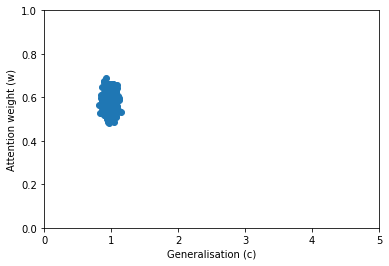

In [7]:
plt.plot(trace_total['c'],trace_total['w'],'o')
plt.xlim([0,5])
plt.ylim([0,1])
plt.xlabel('Generalisation (c)')
plt.ylabel('Attention weight (w)')

#### Probability of categorisation

Text(0, 0.5, 'Probability of categorising as A')

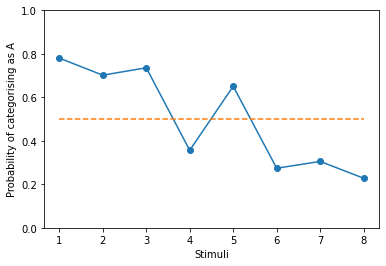

In [6]:
plt.plot(np.linspace(1,8,8),trace_total['p'].mean(axis=0),'o-')
plt.plot(np.linspace(1,8,8),[0.5]*8,'--')
plt.ylim([0,1])
plt.xlabel('Stimuli')
plt.ylabel('Probability of categorising as A')

The category A stimuli (1,2,3,5) have a probability greater than 0.5 in being assigned to category A, and the category B stimuli (4,6,7,8) have a probability lesser than 0.5 for the same. This implies that subjects are performing fairly accurately in categorising the stimuli.

### Individual variations

In [ ]:
#it might take a while for the program to execute.

t=8
traces1=[]

for i in range(len(data['x'])):
    y=data['x'][i]
    
    with pm.Model() as model_b:

        b=0.5
        c=pm.Uniform('c', lower=0, upper=5)
        w=pm.Uniform('w', lower=0, upper=1)

        s=pm.Deterministic('s',pm.math.exp(-c*(w*d1+(1-w)*d2)))
        simA=pm.Deterministic('simA',(np.array([[1 if x==1 else 0 for x in data['a']]]*8)*s).sum(axis=1))
        simB=pm.Deterministic('simB',(np.array([[1 if x==2 else 0 for x in data['a']]]*8)*s).sum(axis=1))

        p=pm.Deterministic('p', b*simA/((b*simA)+((1-b)*simB)))
        y_pred=pm.Binomial('y_pred',p=p,n=t, observed=y)
        trace=pm.sample(1000)
        traces1.append(trace)

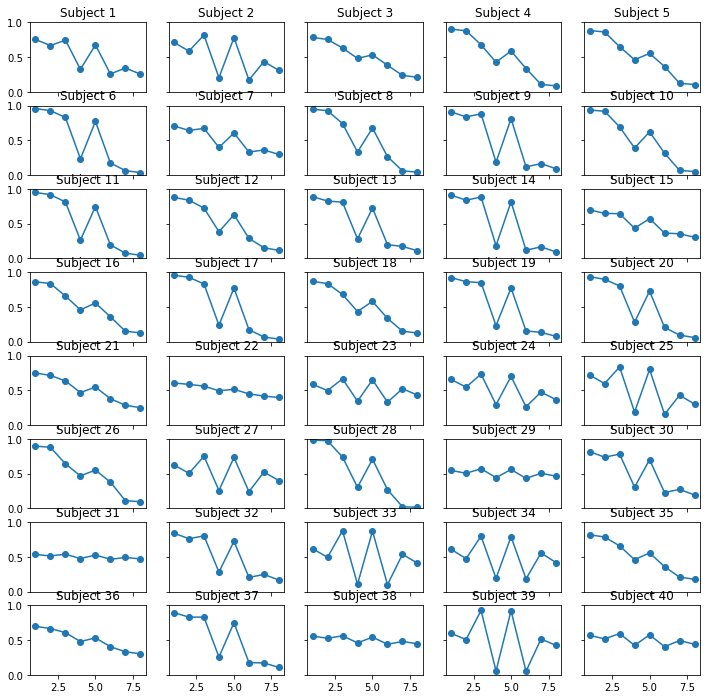

In [204]:
fig, axs=plt.subplots(8,5,figsize=(12,12),sharex=True, sharey=True)

for i in range (8):
    for j in range(5):
        axs[i][j].plot(np.linspace(1,8,8),traces1[i*5+j]['p'].mean(axis=0),'o-')
        plt.ylim([0,1])
        axs[i][j].set_title(f'Subject {i*5+j+1}')

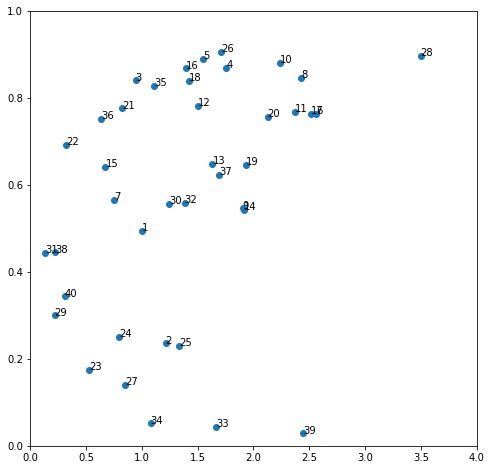

In [210]:
c_list=[]
w_list=[]

for i in range(len(traces1)):
    c_list.append(traces1[i]['c'].mean())
    w_list.append(traces1[i]['w'].mean())

fig, ax = plt.subplots(figsize=(8,8))

ax.plot(c_list,w_list,'o')
ax.set_xlim([0,4])
ax.set_ylim([0,1])

for i in range(40):
    ax.annotate(i+1, (c_list[i], w_list[i]))

Based on the figures above, subjects can be grouped into three types. 

(i) Subjects like 22,29,31, 38 and 40 display guessing behaviour, with an equal probability of assigning the stimuli in both the categories. The subjects have low generalisation values, implying that they have difficulty in finding the differences between stimuli. 

(ii) Subjects like 33,39, 34 (and so on) are very good at categorising stimuli 3,4,5 and 6, which differ significantly in height but are not very accurate with stimuli 1,2,7 and 8 (especially 2 and 7), whose heights are more similar. This can be validated as their attention weight values (w) are very low, implying that they pay more attention to the height of the stimuli.

(iii) Subjects like 3,16,35 (and so on) are good at categorising stimuli 1,2,7 and 8, which differ vastly concerning the vertical line position, but struggle with stimuli 3,4,5 and 6 (especially 4 and 5). This can be validated as their attention weight values (w) are very high, implying that they pay more attention to the position of the vertical line in the stimuli.

In [ ]:
#adapted from (Lee & Wagenmakers, 2015).

t=8
test=[]


for i in range(len(data['x'])):

    y=data['x'][i]

    with pm.Model() as model_c:

        b=0.5
        
        φc=pm.Uniform('φc',lower=0, upper=1)
        φg =pm.Uniform('φg',lower=0, upper=1)
        zck= pm.Bernoulli('zck',p=φc)
        zgk=pm.Bernoulli('zgk',p=φg)
        
        mu_c = pm.Uniform('mu_c',lower=0, upper=5)
        sigma_c = pm.Uniform('sigma_c',lower=0.01, upper= 3)
        c= pm.Normal('c',mu=mu_c,sd=sigma_c) 
        
        mu1_w = pm.Uniform('mu1_w',lower=0, upper=1)
        δ = pm.Uniform('δ',lower=0, upper=1)  
        mu2_w=pm.math.switch(pm.math.lt(mu1_w+δ,1), mu1_w+ δ, 1 )
        sigma_w = pm.Uniform('sigma_w',lower=0.01, upper=1)
        mu_w=pm.math.switch(pm.math.eq(zck,0) and pm.math.eq(zgk,0), mu1_w, mu2_w)
        
        w= pm.Normal('w',mu=mu_w, sd=sigma_w)

        s=pm.Deterministic('s',pm.math.exp(-c*(w*d1+(1-w)*d2)))
        simA=pm.Deterministic('simA',(np.array([[1 if x==1 else 0 for x in data['a']]]*8)*s).sum(axis=1))
        simB=pm.Deterministic('simB',(np.array([[1 if x==2 else 0 for x in data['a']]]*8)*s).sum(axis=1))    
            
        p=pm.math.switch(pm.math.eq(zck,0) ,  b*simA/((b*simA)+((1-b)*simB)), 0.5) #probability of 0.5 for group (i)
            
        y_pred=pm.Binomial('y_pred',p=p,n=t, observed=y)
        trace=pm.sample(1000)
        test.append(trace)

#### Estimating the bias

In [8]:
t=320
y=np.array(data['y']).flatten()

with pm.Model() as model_d:
 
    b=pm.Uniform('b', lower=0, upper=1) #using a uniform prior(0,1) for reasons similar to those for w, mentioned earlier.
    c=pm.Uniform('c', lower=0, upper=5)
    w=pm.Uniform('w', lower=0, upper=1)
  
    s=pm.Deterministic('s',pm.math.exp(-c*(w*d1+(1-w)*d2)))
    simA=pm.Deterministic('simA',(np.array([[1 if x==1 else 0 for x in data['a']]]*8)*s).sum(axis=1))
    simB=pm.Deterministic('simB',(np.array([[1 if x==2 else 0 for x in data['a']]]*8)*s).sum(axis=1))
    p=pm.Deterministic('p', b*simA/((b*simA)+((1-b)*simB)))  
    
    y_pred=pm.Binomial('y_pred',p=p,n=t, observed=y) 
    trace_b=pm.sample(1000)

<ipython-input-8-e0039d444b1b>:17: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_b=pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [w, c, b]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 246 seconds.


<AxesSubplot:title={'center':'x'}>

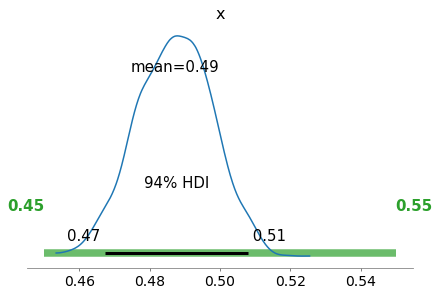

In [10]:
az.plot_posterior(trace_b['b'], rope=(0.45,0.55))

The bias parameter has a mean close to 0.5, and the 94% HDI falls within the ROPE. Therefore assigning b=0.5 is a good choice for the bias parameter. Since the stimuli are uncommon, it would make sense that participants have no bias towards assigning them in one category versus another.

### Post predictive check 

In [13]:
with model_a:
    ppc = pm.sample_posterior_predictive(
        trace_total, var_names=["w", "c",'s','simA','simB',"p",'y_pred']
    )

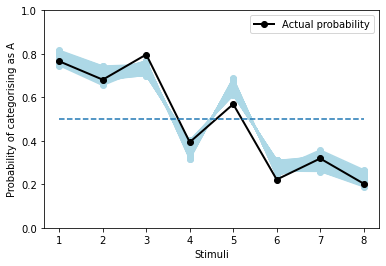

In [14]:
for item in ppc['p']:
    plt.plot(np.linspace(1,8,8),item,'o-', color='lightblue')
plt.plot(np.linspace(1,8,8),y/320,'o-', color='black', linewidth=2, label='Actual probability')
plt.plot(np.linspace(1,8,8),[0.5]*8,'--')
plt.ylim([0,1])
plt.xlabel('Stimuli')
plt.ylabel('Probability of categorising as A')
plt.legend()

The chosen model does seem to be a satisfactory fit for the data.

#### Alternate model

In [15]:
with pm.Model() as model_e:
   
    b=0.5
    c=pm.TruncatedNormal('c', mu=1, sigma=2, lower=0, upper=5) #prior credibiility centered around one; truncated for reasons mentioned earlier.
    w=pm.Beta('w', 0.01, 0.01) #Haldane prior, non-committal.
    
    s=pm.Deterministic('s',pm.math.exp(-c*(w*d1+(1-w)*d2)))
    simA=pm.Deterministic('simA',(np.array([[1 if x==1 else 0 for x in data['a']]]*8)*s).sum(axis=1))
    simB=pm.Deterministic('simB',(np.array([[1 if x==2 else 0 for x in data['a']]]*8)*s).sum(axis=1))
    p=pm.Deterministic('p', b*simA/((b*simA)+((1-b)*simB))) 
    
    y_pred=pm.Binomial('y_pred',p=p,n=t, observed=y) 
    trace_alt=pm.sample(1000)

<ipython-input-15-cc9bdd60dcb1>:13: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_alt=pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [w, c]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 199 seconds.


In [16]:
with model_e:
    ppc1 = pm.sample_posterior_predictive(
        trace_alt, var_names=["w", "c",'s','simA','simB',"p",'y_pred']
    )

##### Sequential Monte Carlo for Bayes factor calculation

In [4]:
#standard model

with pm.Model() as model_f:
    
        b= 0.5 
        c=pm.Uniform('c', lower=0.0, upper=5.0)
        w=pm.Uniform('b', lower=0.0, upper=1.0)

        s=pm.Deterministic('s',pm.math.exp(-c*(w*d1+(1-w)*d2)))
        simA=pm.Deterministic('simA',(np.array([[1 if x==1 else 0 for x in data['a']]]*8)*s).sum(axis=1))
        simB=pm.Deterministic('simB',(np.array([[1 if x==2 else 0 for x in data['a']]]*8)*s).sum(axis=1))
        p=pm.Deterministic('p', b*simA/((b*simA)+((1-b)*simB)))  

        y_pred=pm.Binomial('y_pred',p=p,n=t, observed=y) 
        trace_total_smc=pm.sample_smc(1000) #try running parallel=True if possible.

#alternate model
        
with pm.Model() as model_g:
        
        b= 0.5 
        c=pm.TruncatedNormal('c', mu=1, sd=2, lower=0.0, upper=5.0) #
        w=pm.Beta('b', 0.01, 0.01) 

        s=pm.Deterministic('s',pm.math.exp(-c*(w*d1+(1-w)*d2)))
        simA=pm.Deterministic('simA',(np.array([[1 if x==1 else 0 for x in data['a']]]*8)*s).sum(axis=1))
        simB=pm.Deterministic('simB',(np.array([[1 if x==2 else 0 for x in data['a']]]*8)*s).sum(axis=1))
        p=pm.Deterministic('p', b*simA/((b*simA)+((1-b)*simB)))  

        y_pred=pm.Binomial('y_pred',p=p,n=t, observed=y) 
        trace_alt_smc=pm.sample_smc(1000) #try running parallel=True if possible.


Initializing SMC sampler...
Sampling 2 chains in 2 jobs
Stage:   0 Beta: 0.003
Stage:   1 Beta: 0.018
Stage:   2 Beta: 0.060
Stage:   3 Beta: 0.198
Stage:   4 Beta: 0.684
Stage:   5 Beta: 1.000
Stage:   0 Beta: 0.003
Stage:   1 Beta: 0.017
Stage:   2 Beta: 0.054
Stage:   3 Beta: 0.181
Stage:   4 Beta: 0.604
Stage:   5 Beta: 1.000


##### Bayes factor

In [11]:
BF_smc = np.exp(trace_total_smc.report.log_marginal_likelihood - trace_alt_smc.report.log_marginal_likelihood)
np.round(BF_smc)

array([17., 16.])

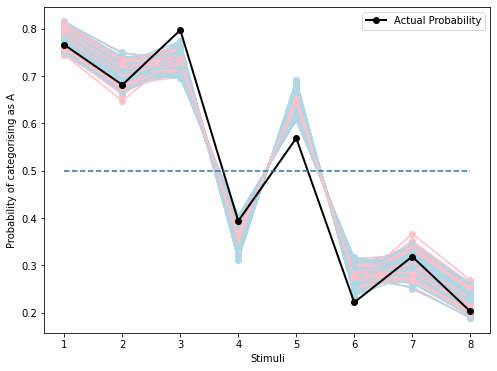

In [49]:
plt.figure(figsize=(8,6))
for i in range (len(ppc['p'])):
    plt.plot(np.linspace(1,8,8),ppc['p'][i],'o-', color='lightblue') #standard model
    plt.plot(np.linspace(1,8,8),ppc1['p'][i],'o-', color='pink') #alternate model
    
plt.plot(np.linspace(1,8,8),y/320,'o-', color='black', linewidth=2, label='Actual Probability')
plt.plot(np.linspace(1,8,8),[0.5]*8,'--')
plt.xlabel('Stimuli')
plt.ylabel('Probability of categorising as A')
plt.legend()

Looking at the Bayes factor and the graph, we can conclude that the standard model is better than the alternate model. This is because the standard model has a higher marginal likelihood, and is a better approximator of the observed data.  

### References

Lee, M., & Wagenmakers, E. (2015). Bayesian cognitive modeling. Cambridge: Cambridge University Press.